In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

iris = pd.read_csv("iris.csv")
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
np.random.seed(0)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(["Species"], axis=1), iris["Species"], test_size=0.3)

In [4]:
from sklearn.tree import DecisionTreeClassifier


In [14]:
DTree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20, min_samples_leaf=3)

DTree.fit(X_train, y_train)

print("Genauigkeit der Testdaten: {:.4f}".format(DTree.score(X_test, y_test)))

Genauigkeit der Testdaten: 0.9778


In [16]:
from sklearn.metrics import classification_report
y_pred = DTree.predict(X_test)
cf = classification_report(y_test, y_pred)
print(cf)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.94      0.97        18
  virginica       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



Normalized confusion matrix


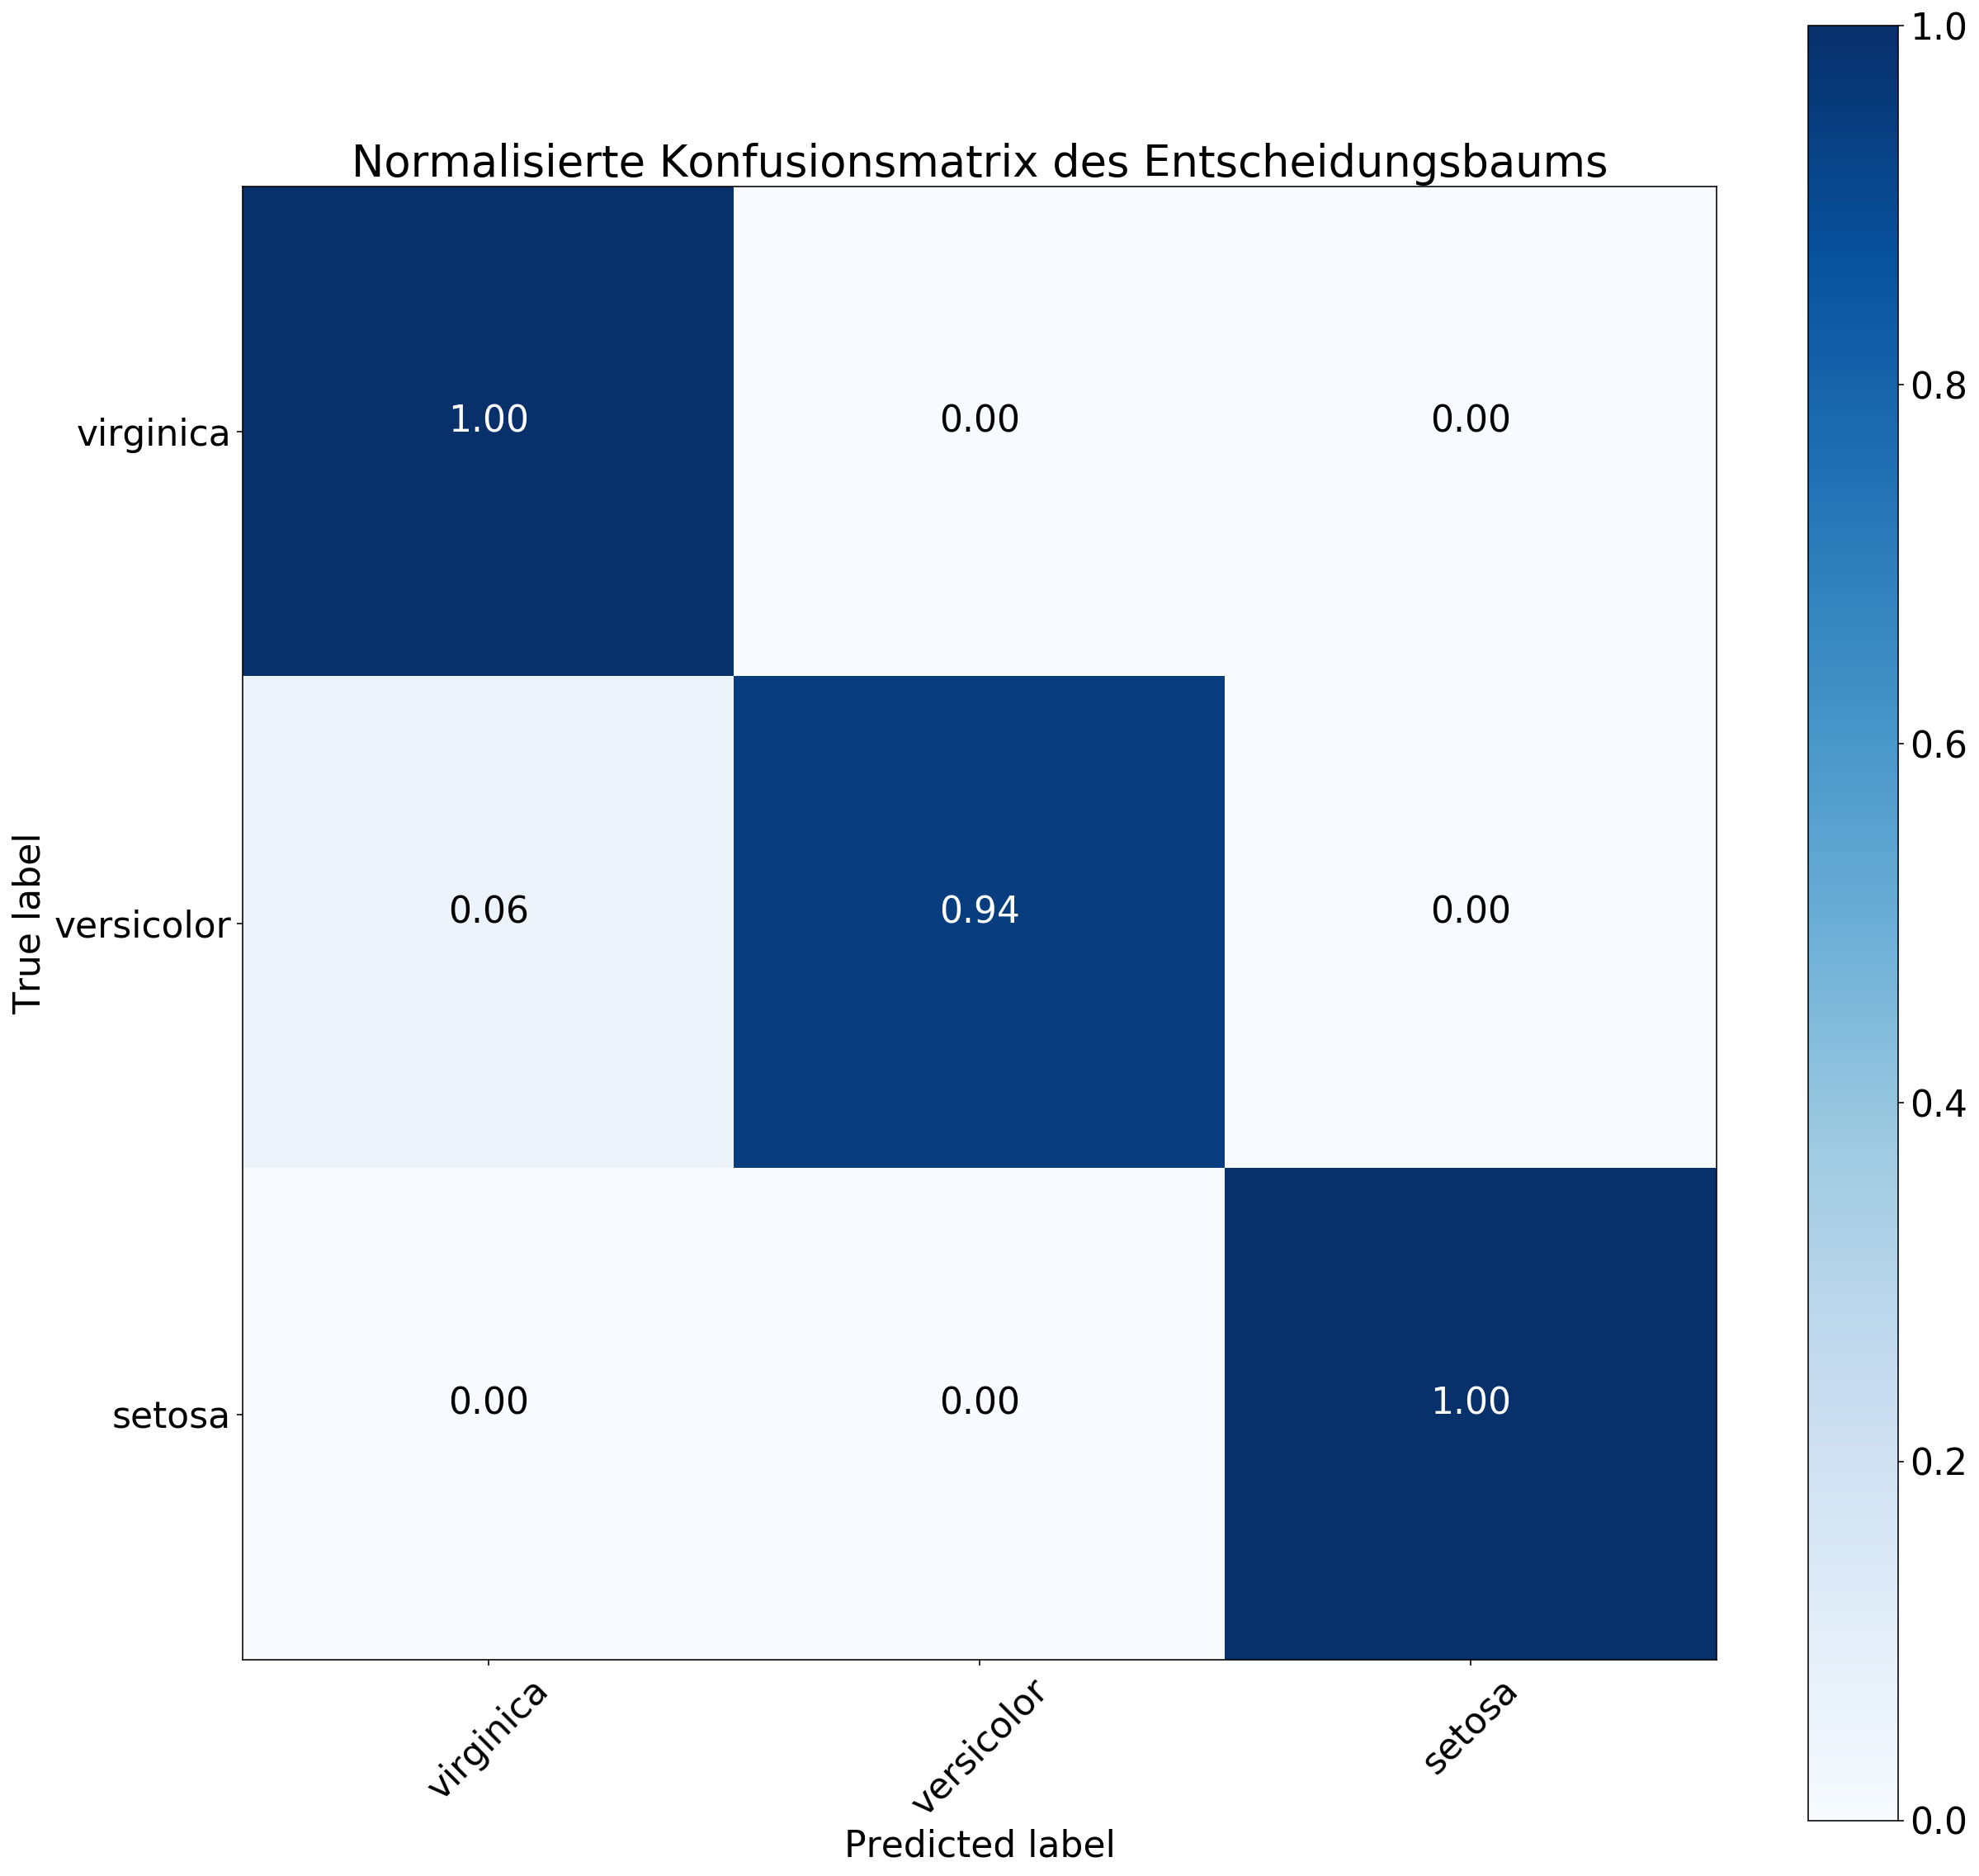

In [17]:
%run confusion_matrix_style.py

y_pred = DTree.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred, labels=y_test.unique())
plot_confusion_matrix(cnf_matrix, classes=y_test.unique(), normalize=True, title='Normalisierte Konfusionsmatrix des Entscheidungsbaums')

plt.show()